In [ ]:
# 1:
# A* Search Algorithm for Route Finding Problem

from queue import PriorityQueue

def a_star_search(graph, heuristics, start, goal):
    pq = PriorityQueue()
    pq.put((0, start))
    g_cost = {start: 0}
    parent = {start: None}

    while not pq.empty():
        cost, node = pq.get()

        if node == goal:
            break

        for neighbor, distance in graph[node].items():
            new_cost = g_cost[node] + distance
            if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                g_cost[neighbor] = new_cost
                priority = new_cost + heuristics[neighbor]
                pq.put((priority, neighbor))
                parent[neighbor] = node

    # Reconstruct path
    path = []
    n = goal
    while n is not None:
        path.append(n)
        n = parent[n]
    path.reverse()

    return path, g_cost[goal]


# --- Example graph (Real-life: city distances) ---
graph = {
    'Pune': {'Mumbai': 120, 'Nashik': 210, 'Satara': 110},
    'Mumbai': {'Pune': 120, 'Nashik': 160},
    'Nashik': {'Pune': 210, 'Mumbai': 160, 'Nagpur': 700},
    'Satara': {'Pune': 110, 'Kolhapur': 130},
    'Kolhapur': {'Satara': 130, 'Goa': 200},
    'Nagpur': {'Nashik': 700, 'Hyderabad': 500},
    'Goa': {'Kolhapur': 200},
    'Hyderabad': {'Nagpur': 500}
}

# --- Heuristic values (straight-line estimate to goal) ---
heuristics = {
    'Pune': 400, 'Mumbai': 300, 'Nashik': 500,
    'Satara': 350, 'Kolhapur': 200, 'Nagpur': 800,
    'Goa': 0, 'Hyderabad': 600
}

# --- Run A* Search ---
path, cost = a_star_search(graph, heuristics, 'Pune', 'Goa')

print("Shortest Path:", " → ".join(path))
print("Total Distance:", cost)


In [23]:
# 2:BFS 
from collections import deque

def bfs_shortest_path(maze, start, goal):
    # 0 = free cell, 1 = obstacle
    rows, cols = len(maze), len(maze[0])
    moves = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right

    queue = deque([[start]])   # store only the path
    visited = {start}

    while queue:
        path = queue.popleft()
        r, c = path[-1]

        if (r, c) == goal:
            return path  # shortest path found

        for dr, dc in moves:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0 and (nr, nc) not in visited:
                visited.add((nr, nc))
                queue.append(path + [(nr, nc)])
    return None

# --- Example Maze ---
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start, goal = (0, 0), (4, 4)
path = bfs_shortest_path(maze, start, goal)

if path:
    print("Shortest Path:", path)
    print("Number of Steps:", len(path) - 1)
else:
    print("No path found!")


Shortest Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Number of Steps: 8


In [25]:
#3 
# Depth-First Search (DFS) traversal on a graph

def dfs(graph, node, visited=None):
    if visited is None:
        visited = []
    visited.append(node)

    # Visit each connected node (neighbor)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

    return visited


# --- Example Game Map Graph ---
game_map = {
    'Start': ['A', 'B'],
    'A': ['C', 'D'],
    'B': ['E'],
    'C': [],
    'D': ['F'],
    'E': ['F'],
    'F': ['Goal'],
    'Goal': []
}

# --- Run DFS ---
order = dfs(game_map, 'Start')

# --- Display Result ---
print("DFS Traversal Order:")
print(" → ".join(order))


DFS Traversal Order:
Start → A → C → D → F → Goal → B → E


In [27]:
# 4:Develop a pathfinding solution using the A* algorithm for a maze-based game environment. The 
# agent must find the most cost-efficient route from the start position to the goal, considering 
# movement costs and a suitable heuristic function (e.g., Manhattan distance) to guide the search 
# efficiently. 


import heapq

# --- Heuristic Function: Manhattan Distance ---
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# --- A* Search Algorithm ---
def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = [(0, start)]  # (f_cost, node)
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:  # reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        # 4 directions: up, down, left, right
        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
            r, c = current[0] + dr, current[1] + dc
            if not (0 <= r < rows and 0 <= c < cols):  # bounds
                continue
            if maze[r][c] == 1:  # wall
                continue

            neighbor = (r, c)
            new_cost = g_score[current] + 1
            if neighbor not in g_score or new_cost < g_score[neighbor]:
                g_score[neighbor] = new_cost
                f_score = new_cost + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score, neighbor))
                came_from[neighbor] = current
    return None

# --- Example Maze ---
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start, goal = (0, 0), (4, 4)
path = astar(maze, start, goal)

# --- Output ---
if path:
    print("Shortest path found by A*:\n", path)
    print("Steps:", len(path) - 1)
else:
    print("No path found!")


Shortest path found by A*:
 [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Steps: 8


In [ ]:
# 5. Implementation of 8 puzzles game. 

import heapq

# --- Heuristic: Manhattan Distance ---
def manhattan(puzzle, goal):
    dist = 0
    for i in range(9):
        if puzzle[i] == 0: 
            continue
        x1, y1 = divmod(i, 3)
        x2, y2 = divmod(goal.index(puzzle[i]), 3)
        dist += abs(x1 - x2) + abs(y1 - y2)
    return dist

# --- Get Possible Moves ---
def get_neighbors(state):
    i = state.index(0)
    r, c = divmod(i, 3)
    moves = []
    for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
        nr, nc = r+dr, c+dc
        if 0 <= nr < 3 and 0 <= nc < 3:
            j = nr*3 + nc
            new_state = list(state)
            new_state[i], new_state[j] = new_state[j], new_state[i]
            moves.append(tuple(new_state))
    return moves

# --- Reconstruct Path ---
def reconstruct(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

# --- A* Algorithm ---
def a_star(start, goal):
    open_heap = [(manhattan(start, goal), start)]
    came_from = {}
    g = {start: 0}

    while open_heap:
        _, current = heapq.heappop(open_heap)
        if current == goal:
            return reconstruct(came_from, current)

        for neighbor in get_neighbors(current):
            tentative = g[current] + 1
            if neighbor not in g or tentative < g[neighbor]:
                g[neighbor] = tentative
                f = tentative + manhattan(neighbor, goal)
                heapq.heappush(open_heap, (f, neighbor))
                came_from[neighbor] = current
    return None

# --- Example ---
start = (1, 2, 3,
         4, 0, 5,
         6, 7, 8)

goal = (1, 2, 3,
        4, 5, 6,
        7, 8, 0)

path = a_star(start, goal)

# --- Print Solution ---
if path:
    print(f"Puzzle solved in {len(path)-1} moves!\n")
    for step in path:
        print(step[0:3])
        print(step[3:6])
        print(step[6:9])
        print()
else:
    print("No solution found.")


In [5]:
#6:Tic tac toe
def print_board(board):
    print("\nCurrent Board:")
    for i in range(3):
        print(" " + " | ".join(board[i]))
        if i < 2:
            print("---+---+---")

def check_winner(board):
    # Rows and Columns
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != " ":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != " ":
            return board[0][i]
    # Diagonals
    if board[0][0] == board[1][1] == board[2][2] != " ":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != " ":
        return board[0][2]
    return None

def is_full(board):
    return all(cell != " " for row in board for cell in row)

def play_game():
    board = [[" "]*3 for _ in range(3)]
    player = "X"
    print("🎮 Welcome to Tic-Tac-Toe 🎮")
    print_board(board)

    while True:
        print(f"\nPlayer {player}'s turn:")
        try:
            row = int(input("Enter row (0-2): "))
            col = int(input("Enter column (0-2): "))
        except ValueError:
            print("Enter valid numbers only!")
            continue

        if not (0 <= row < 3 and 0 <= col < 3):
            print("Invalid position! Try again.")
            continue
        if board[row][col] != " ":
            print("Cell already taken! Try again.")
            continue

        board[row][col] = player
        print_board(board)

        if check_winner(board):
            print(f"\n Player {player} wins!")
            break
        if is_full(board):
            print("\n It's a draw!")
            break

        player = "O" if player == "X" else "X"

# Run Game
play_game()


🎮 Welcome to Tic-Tac-Toe 🎮

Current Board:
   |   |  
---+---+---
   |   |  
---+---+---
   |   |  

Player X's turn:


Enter row (0-2):  0
Enter column (0-2):  0



Current Board:
 X |   |  
---+---+---
   |   |  
---+---+---
   |   |  

Player O's turn:


Enter row (0-2):  0
Enter column (0-2):  1



Current Board:
 X | O |  
---+---+---
   |   |  
---+---+---
   |   |  

Player X's turn:


Enter row (0-2):  0
Enter column (0-2):  2



Current Board:
 X | O | X
---+---+---
   |   |  
---+---+---
   |   |  

Player O's turn:


Enter row (0-2):  1
Enter column (0-2):  0



Current Board:
 X | O | X
---+---+---
 O |   |  
---+---+---
   |   |  

Player X's turn:


Enter row (0-2):  1
Enter column (0-2):  1



Current Board:
 X | O | X
---+---+---
 O | X |  
---+---+---
   |   |  

Player O's turn:


Enter row (0-2):  1
Enter column (0-2):  2



Current Board:
 X | O | X
---+---+---
 O | X | O
---+---+---
   |   |  

Player X's turn:


Enter row (0-2):  2
Enter column (0-2):  0



Current Board:
 X | O | X
---+---+---
 O | X | O
---+---+---
 X |   |  

 Player X wins!


In [7]:

# 7: Tower of Hanoi using Recursion

def hanoi(n, source, helper, destination):
    if n == 1:
        print(f"Move disk 1 from {source} → {destination}")
        return
    # Move n-1 disks from source to helper
    hanoi(n - 1, source, destination, helper)
    # Move the largest disk from source to destination
    print(f"Move disk {n} from {source} → {destination}")
    # Move n-1 disks from helper to destination
    hanoi(n - 1, helper, source, destination)

# --- Main Program ---
n = int(input("Enter number of disks: "))
print("\nSequence of moves:")
hanoi(n, 'A', 'B', 'C')






   

Enter number of disks:  3



Sequence of moves:
Move disk 1 from A → C
Move disk 2 from A → B
Move disk 1 from C → B
Move disk 3 from A → C
Move disk 1 from B → A
Move disk 2 from B → C
Move disk 1 from A → C


In [36]:
#8. Implementation of Water jug problems.

from collections import deque

def water_jug_bfs(jug1_capacity, jug2_capacity, target):
    visited = set()
    q = deque([(0, 0)])  # both jugs empty initially
    visited.add((0, 0))

    print("Steps to reach the target:\n")

    while q:
        x, y = q.popleft()
        print(f"({x}, {y})")

        # Goal check
        if x == target or y == target:
            print("\n Reached the target amount!")
            return True

        # Generate next possible states
        next_states = set()

        # 1. Fill Jug1 or Jug2
        next_states.add((jug1_capacity, y))
        next_states.add((x, jug2_capacity))

        # 2. Empty Jug1 or Jug2
        next_states.add((0, y))
        next_states.add((x, 0))

        # 3. Pour Jug1 → Jug2
        pour = min(x, jug2_capacity - y)
        next_states.add((x - pour, y + pour))

        # 4. Pour Jug2 → Jug1
        pour = min(y, jug1_capacity - x)
        next_states.add((x + pour, y - pour))

        # Add all unvisited states to the queue
        for state in next_states:
            if state not in visited:
                visited.add(state)
                q.append(state)

    print("\n No solution possible.")
    return False


# --- Example ---
jug1 = 4
jug2 = 3
target = 2
water_jug_bfs(jug1, jug2, target)



Steps to reach the target:

(0, 0)
(4, 0)
(0, 3)
(1, 3)
(4, 3)
(3, 0)
(1, 0)
(3, 3)
(0, 1)
(4, 2)

 Reached the target amount!


True

Dataset Loaded Successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


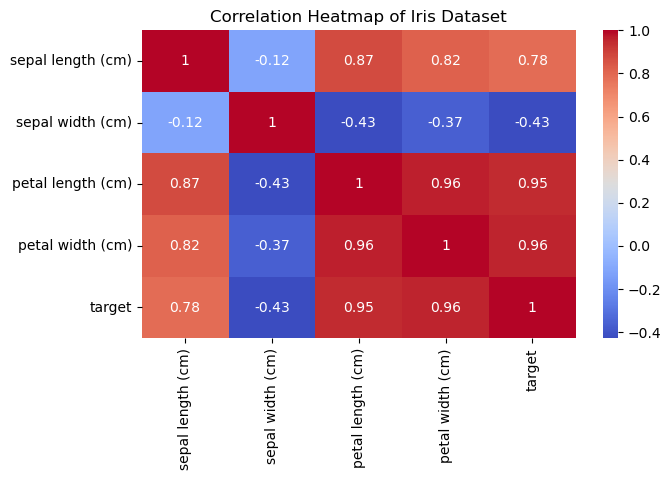

<Figure size 700x400 with 0 Axes>

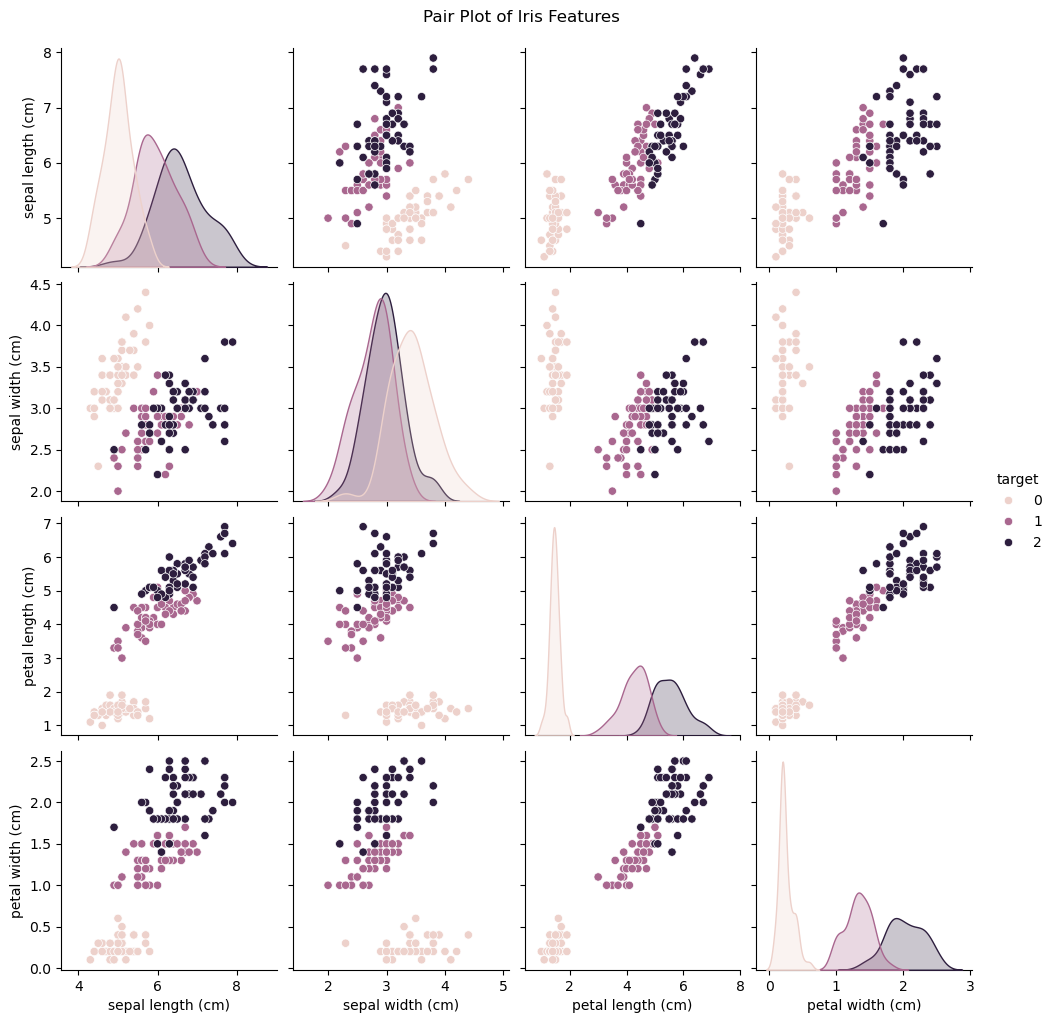

Number of PCA Components selected: 2

Model Comparison:
          Model  R² Score      RMSE
0  Without PCA  0.946896  0.192649
1     With PCA  0.906357  0.255824


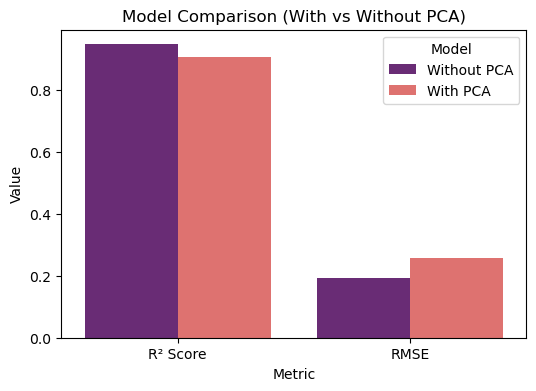

In [2]:
# 9: 
# Uber Ride Price Prediction using PCA and EDA (No xlrd required)

# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # --- STEP 1: Load dataset (save your .xls file as .csv first) ---
# # Example path: C:\Users\Documents\AIML\uber_data.csv
# # df = pd.read_csv(r"C:\Users\Documents\AIML\uber_data.csv")
# df = pd.read_csv(r"C:\Users\dhira\Documents\Labs\AIML\uber.xls")


# # --- STEP 2: Basic EDA ---
# print("\nFirst 5 Rows:\n", df.head())
# print("\nDataset Info:\n")
# print(df.info())
# print("\nSummary Statistics:\n", df.describe())
# print("\nMissing Values:\n", df.isnull().sum())

# # --- STEP 3: Correlation Heatmap ---
# plt.matshow(df.corr(), cmap='coolwarm')
# plt.title("Feature Correlation Heatmap")
# plt.colorbar()
# plt.show()

# # --- STEP 4: Define Features (X) and Target (y) ---
# # Change 'price' to your target column name if different
# X = df.drop(columns=['price'])
# y = df['price']

# # --- STEP 5: Split Data ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- STEP 6: Standardize Features ---
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # --- STEP 7: Model without PCA ---
# model1 = LinearRegression()
# model1.fit(X_train_scaled, y_train)
# y_pred1 = model1.predict(X_test_scaled)

# # --- STEP 8: Apply PCA (reduce to 2 components) ---
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# # --- STEP 9: Model with PCA ---
# model2 = LinearRegression()
# model2.fit(X_train_pca, y_train)
# y_pred2 = model2.predict(X_test_pca)

# # --- STEP 10: Compare Performance ---
# print("\nModel Performance (Without PCA):")
# print("R² Score :", round(r2_score(y_test, y_pred1), 3))
# print("RMSE :", round(mean_squared_error(y_test, y_pred1, squared=False), 3))
# print("MAE :", round(mean_absolute_error(y_test, y_pred1), 3))

# print("\nModel Performance (With PCA):")
# print("R² Score :", round(r2_score(y_test, y_pred2), 3))
# print("RMSE :", round(mean_squared_error(y_test, y_pred2, squared=False), 3))
# print("MAE :", round(mean_absolute_error(y_test, y_pred2), 3))

# # --- STEP 11: PCA Visualization ---
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
# plt.title("Data after PCA (2 Components)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show()






# ---------------------------------------------------Iris Data set---------------------


# --- Problem 9: PCA and EDA on Iris Dataset ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- Load Dataset ---
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Dataset Loaded Successfully!")
print(df.head())

# --- EDA ---
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

plt.figure(figsize=(7, 4))
sns.pairplot(df, hue="target")
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

# --- Features and Target ---
X = df.drop(columns=['target'])
y = df['target']

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model 1: Without PCA ---
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)

r2_no_pca = r2_score(y_test, y_pred1)
rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred1))

# --- PCA (retain 95% variance) ---
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of PCA Components selected:", pca.n_components_)

# --- Model 2: With PCA ---
model2 = LinearRegression()
model2.fit(X_train_pca, y_train)
y_pred2 = model2.predict(X_test_pca)

r2_pca = r2_score(y_test, y_pred2)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred2))

# --- Compare Models ---
comparison = pd.DataFrame({
    "Model": ["Without PCA", "With PCA"],
    "R² Score": [r2_no_pca, r2_pca],
    "RMSE": [rmse_no_pca, rmse_pca]
})
print("\nModel Comparison:\n", comparison)

# --- Visualization ---
plt.figure(figsize=(6, 4))
sns.barplot(data=comparison.melt(id_vars="Model", var_name="Metric", value_name="Value"),
            x="Metric", y="Value", hue="Model", palette="magma")
plt.title("Model Comparison (With vs Without PCA)")
plt.show()



 Iris dataset loaded successfully
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


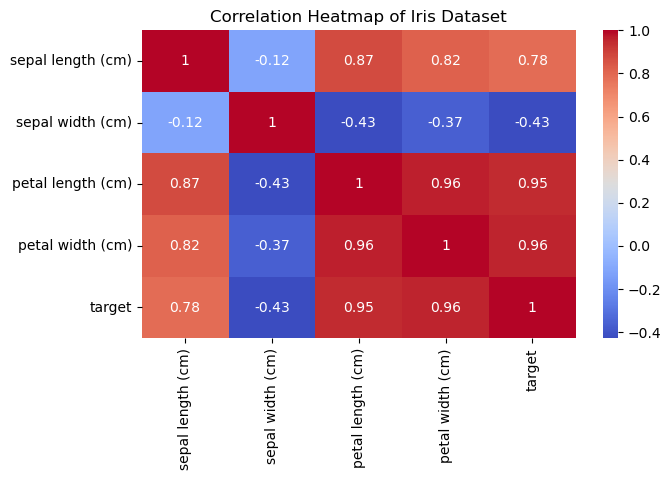

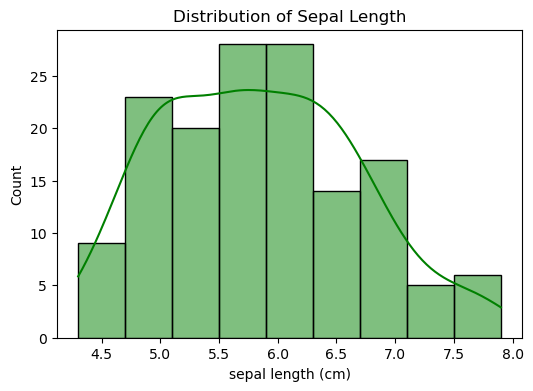


--- Model Evaluation ---
R² Score : 0.906
RMSE     : 0.256
MAE      : 0.190


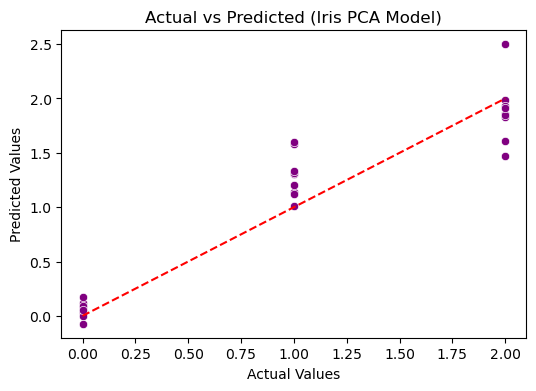

In [1]:
#10:

# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error

# # df = pd.read_csv("uber.csv")
# df = pd.read_csv(r"C:\Users\dhira\Documents\Labs\AIML\uberc.csv")

# df = df.drop_duplicates().dropna()
# numeric_df = df.select_dtypes(include=[np.number])

# target_col = None
# for col in ['fare_amount', 'price', 'amount', 'fare']:
#     if col in numeric_df.columns:
#         target_col = col
#         break
# if target_col is None:
#     raise ValueError("No valid target column found in dataset.")

# X = numeric_df.drop(columns=[target_col])
# y = numeric_df[target_col]

# print("Dataset Shape:", df.shape)
# print("Target Variable:", target_col)
# print("Feature Columns:", list(X.columns))

# plt.figure(figsize=(10, 6))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Heatmap")
# plt.show()

# plt.figure(figsize=(7, 4))
# sns.histplot(y, kde=True, bins=30, color='skyblue')
# plt.title(f"Distribution of {target_col}")
# plt.xlabel(target_col)
# plt.show()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model1 = LinearRegression()
# model1.fit(X_train_scaled, y_train)
# y_pred1 = model1.predict(X_test_scaled)

# r2_no_pca = r2_score(y_test, y_pred1)
# rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred1))

# pca = PCA()
# pca.fit(X_train_scaled)
# explained = np.cumsum(pca.explained_variance_ratio_)
# plt.figure(figsize=(7, 4))
# plt.plot(range(1, len(explained) + 1), explained, marker='o')
# plt.axhline(0.95, color='r', linestyle='--')
# plt.title("Cumulative Explained Variance by PCA")
# plt.xlabel("No. of Components")
# plt.ylabel("Cumulative Variance")
# plt.grid(True)
# plt.show()

# n_components_95 = int(np.searchsorted(explained, 0.95) + 1)
# pca = PCA(n_components=n_components_95)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# model2 = LinearRegression()
# model2.fit(X_train_pca, y_train)
# y_pred2 = model2.predict(X_test_pca)

# r2_pca = r2_score(y_test, y_pred2)
# rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred2))

# comparison = pd.DataFrame({
#     "Model": ["Without PCA", "With PCA"],
#     "R² Score": [r2_no_pca, r2_pca],
#     "RMSE": [rmse_no_pca, rmse_pca]
# })
# print("\nModel Performance Comparison:\n", comparison)

# plt.figure(figsize=(6, 4))
# sns.barplot(data=comparison.melt(id_vars="Model", var_name="Metric", value_name="Value"),
#             x="Metric", y="Value", hue="Model", palette="viridis")
# plt.title("Model Comparison (With vs Without PCA)")
# plt.show()






# ----------------------------------------- Iris data set-------------------

# --- Problem 10: PCA and EDA on Iris Dataset ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_iris

# --- Load Iris Dataset ---
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(" Iris dataset loaded successfully")
print(df.head())

# --- EDA ---
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['sepal length (cm)'], kde=True, color='green')
plt.title("Distribution of Sepal Length")
plt.show()

# --- Features and Target ---
X = df.drop(columns=['target'])
y = df['target']

# --- Split & Scale ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Apply PCA ---
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- Train Model ---
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# --- Evaluate Model ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"R² Score : {r2:.3f}")
print(f"RMSE     : {rmse:.3f}")
print(f"MAE      : {mae:.3f}")

# --- Visualization ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Iris PCA Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



In [5]:
# 11. Implement a Linear Regression model to predict house prices from area, bedrooms, and location 
# features. Apply K-Fold Cross-Validation to validate the model. 

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\House Price Prediction Dataset_11.csv")
print(df.head())

# --- Features and Target ---
# Make sure column names match EXACTLY as in the dataset
X = df[['Area', 'Bedrooms', 'Location']]
y = df['Price']

# --- Preprocessing: OneHotEncode "Location" (Categorical) ---
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Location'])],
    remainder='passthrough'
)

# --- Model pipeline ---
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# --- Apply K-Fold Cross Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

# --- Results ---
print("\nR² scores for each fold:", scores)
print("Average R² score:", np.mean(scores))



   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

R² scores for each fold: [-0.00378277 -0.00769105 -0.0022709  -0.01473152 -0.00443915]
Average R² score: -0.0065830786125451015


In [7]:
#12. Build a Linear Regression model from scratch to predict students’ final exam scores based on 
# their study hours. Implement all computations manually (without using built-in regression 
# libraries) — including parameter estimation, prediction, and model evaluation using Mean 
# Squared Error (MSE) and R² Score.
    
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\student_exam_scores_12_13.csv")
print(df.head())

# --- Select relevant columns (use exact column names!) ---
X = df['hours_studied'].values
y = df['exam_score'].values

# --- Manual Linear Regression ---
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate slope (m) and intercept (c)
num = np.sum((X - x_mean) * (y - y_mean))
den = np.sum((X - x_mean)**2)
m = num / den
c = y_mean - m * x_mean

# --- Prediction ---
y_pred = m * X + c

# --- Evaluation ---
mse = np.mean((y - y_pred)**2)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)

# --- Output ---
print("\nEquation: y =", round(m, 3), "* x +", round(c, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))



  student_id  hours_studied  sleep_hours  attendance_percent  Internal_marks  \
0       S001            8.0          8.8                72.1              45   
1       S002            1.3          8.6                60.7              55   
2       S003            4.0          8.2                73.7              86   
3       S004            3.5          4.8                95.1              66   
4       S005            9.1          6.4                89.8              71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  

Equation: y = 1.634 * x + 23.618
Mean Squared Error (MSE): 18.194
R² Score: 0.603


In [9]:
#  13. Build a Linear Regression model to predict students’ exam scores using study hours, attendance, 
# and internal marks. Validate model accuracy using K-Fold Cross-Validation.
    
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\student_exam_scores_12_13.csv")
print(df.head())

# --- Features and Target (use correct column names) ---
X = df[['hours_studied', 'attendance_percent', 'Internal_marks']]
y = df['exam_score']

# --- Model ---
model = LinearRegression()

# --- 5-Fold Cross-Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

# --- Results ---
print("\nR² Scores for each fold:", scores)
print("Average R² Score:", np.mean(scores))


  student_id  hours_studied  sleep_hours  attendance_percent  Internal_marks  \
0       S001            8.0          8.8                72.1              45   
1       S002            1.3          8.6                60.7              55   
2       S003            4.0          8.2                73.7              86   
3       S004            3.5          4.8                95.1              66   
4       S005            9.1          6.4                89.8              71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  

R² Scores for each fold: [0.81390198 0.81788693 0.7487704  0.67066443 0.79379736]
Average R² Score: 0.7690042235334408


In [ ]:
#  14. Develop a Linear Regression model to estimate IT professionals’ salaries based on experience, 
# education, and skills. Evaluate performance using 5-Fold Cross-Validation.

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import numpy as np

# Load dataset (CSV file after converting from Excel)
df = pd.read_csv(r"C:\Users\sanap\Downloads\Salary Data 14.csv")

# Remove rows where Salary is missing
df = df.dropna(subset=['Salary'])

print(df.head())

# --- Features and Target ---
X = df[['Years of Experience', 'Education Level', 'Job Title', 'Gender']]
y = df['Salary']

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute', SimpleImputer(strategy='median'), ['Years of Experience']),
        ('cat_encode', OneHotEncoder(handle_unknown='ignore'), ['Education Level', 'Job Title', 'Gender'])
    ],
    remainder='drop'
)

# --- Model Pipeline ---
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# --- K-Fold Cross Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print("\nR² Scores:", scores)
print("Average R²:", np.mean(scores))

# --- Predictions for Evaluation ---
y_pred = cross_val_predict(model, X, y, cv=kfold)

# Compute RMSE manually (no squared=False needed)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print("\nRMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))


In [17]:
#15. Create a Linear Regression model to forecast monthly sales using ad spend, discounts, and 
# customer footfall. Use 5-Fold Cross-Validation to assess prediction accuracy. 
    

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import numpy as np

# Load dataset (CSV file after converting from Excel)
df = pd.read_csv(r"C:\Users\sanap\Downloads\Salary Data 14.csv")

# Remove rows where Salary is missing
df = df.dropna(subset=['Salary'])

print(df.head())

# --- Features and Target ---
X = df[['Years of Experience', 'Education Level', 'Job Title', 'Gender']]
y = df['Salary']

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute', SimpleImputer(strategy='median'), ['Years of Experience']),
        ('cat_encode', OneHotEncoder(handle_unknown='ignore'), ['Education Level', 'Job Title', 'Gender'])
    ],
    remainder='drop'
)

# --- Model Pipeline ---
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# --- K-Fold Cross Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print("\nR² Scores:", scores)
print("Average R²:", np.mean(scores))

# --- Predictions for Evaluation ---
y_pred = cross_val_predict(model, X, y, cv=kfold)

# Compute RMSE manually (no squared=False needed)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print("\nRMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

R² Scores: [0.87160253 0.89708565 0.833746   0.81139371 0.81750019]
Average R²: 0.8462656175267582

RMSE: 18757.015
MAE: 12992.566


In [33]:
# 15 --- Monthly Sales Forecast using Linear Regression and Cross-Validation ---

# --- Monthly Sales Forecast using Linear Regression and Cross-Validation ---

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# --- Load Dataset ---
df = pd.read_csv(r"C:\Users\sanap\Downloads\15 ad spends.csv")

print("\nFirst 5 Rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n", df.describe())

# --- Select Relevant Features and Target ---
# Using stronger predictors for revenue
X = df[['Ad_Spend', 'Impressions', 'Conversion_Rate', 'Units_Sold']]
y = df['Revenue']

# --- Standardize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Define Linear Regression model ---
model = LinearRegression()

# --- 5-Fold Cross-Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')

# --- Display Cross-Validation Results ---
print("\nR² Scores for each fold:", np.round(scores, 3))
print("Average R² Score:", round(np.mean(scores), 3))

# --- Fit model on entire data ---
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# --- Evaluate Model ---
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  # manual square root instead of squared=False
mae = mean_absolute_error(y, y_pred)

print("\nModel Evaluation (Full Dataset):")
print("R² Score:", round(r2_score(y, y_pred), 3))
print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))



First 5 Rows:
                          Transaction_ID     Customer_ID   Product_ID  \
0  8b460852-7c64-46fa-998b-b0976879d082     Customer_65  Product_224   
1  418612e7-8744-4ba3-bb0c-105b47e2a968   Customer_1910  Product_584   
2  5bc3b98f-cb0c-4b12-947c-df8bbb35a73e   Customer_2306  Product_374   
3  28fb67c8-e8c0-447a-841c-f760730de0eb  Customer_17206  Product_220   
4  8bee087a-a8a9-45bb-89d7-04d1710f1b00  Customer_16033  Product_358   

  Transaction_Date  Units_Sold  Discount_Applied  Revenue  Clicks  \
0       2024-10-06         134              0.14   305.54      11   
1       2024-10-29         109              0.30  1102.19      15   
2       2024-04-04         116              0.04   471.29      16   
3       2024-08-25         125              0.20   980.26      12   
4       2024-05-05         132              0.07   803.76      44   

   Impressions  Conversion_Rate         Category         Region  Ad_CTR  \
0           65             0.17      Electronics         Euro

In [21]:
#16. Apply the Naïve Bayes algorithm to a real-world classification problem such as email spam 
# detection, sentiment analysis, or disease diagnosis. Train and test the model, then evaluate its 
# performance using a Confusion Matrix and related metrics such as accuracy, precision, recall, and 
# F1-score. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\emails_16_17_18_19.csv")

# Drop non-numeric and target column
X = df.drop(columns=['Prediction', 'Email No.'], errors='ignore')

# Replace missing values with 0
X = X.fillna(0)

# Target column
y = df['Prediction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))




Confusion Matrix:
 [[709  41]
 [ 16 269]]
Accuracy : 0.9449275362318841
Precision: 0.867741935483871
Recall   : 0.9438596491228071
F1 Score : 0.9042016806722689


In [23]:
#17. Implement the Naïve Bayes algorithm from scratch to solve a real-world classification problem 
# such as email spam detection, sentiment analysis, or disease diagnosis. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\emails_16_17_18_19.csv")

# Select features (all word columns) and target (Prediction column)
X = df.drop(columns=['Email No.', 'Prediction'], errors='ignore')
y = df['Prediction']

# Fill any missing values
X = X.fillna(0)

# Convert to numpy
X = X.to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert to numpy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate priors
P_spam = np.mean(y_train == 1)
P_ham = np.mean(y_train == 0)

# Calculate likelihoods with Laplace smoothing
spam_word_count = np.sum(X_train[y_train == 1], axis=0) + 1
ham_word_count = np.sum(X_train[y_train == 0], axis=0) + 1

total_spam_words = np.sum(spam_word_count)
total_ham_words = np.sum(ham_word_count)

# Prediction function
def predict(X):
    predictions = []
    for x in X:
        log_spam = np.sum(x * np.log(spam_word_count / total_spam_words)) + np.log(P_spam)
        log_ham = np.sum(x * np.log(ham_word_count / total_ham_words)) + np.log(P_ham)
        predictions.append(1 if log_spam > log_ham else 0)
    return np.array(predictions)

# Predict
y_pred = predict(X_test)

# Accuracy
acc = np.mean(y_pred == y_test)
print("\nAccuracy:", acc)



Accuracy: 0.9449275362318841


In [25]:
#18. Implementation an Email Spam Detection model using a Support Vector Machine (SVM) for 
# binary classification, where emails are categorized as Normal (Not Spam) or Abnormal (Spam). 
# Apply oversampling or undersampling techniques to handle class imbalance and analyze model 
# performance using appropriate evaluation metrics. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\emails_16_17_18_19.csv")

# Remove ID column if present
df = df.drop(columns=['Email No.'], errors='ignore')

# Features = all word count columns
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Handle any missing values
X = X.fillna(0)

# Handle class imbalance using oversampling
majority = df[df['Prediction'] == 0]
minority = df[df['Prediction'] == 1]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=0)
df_balanced = pd.concat([majority, minority_upsampled])

# Re-separate after balancing
X_bal = df_balanced.drop(columns=['Prediction'])
y_bal = df_balanced['Prediction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=0)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))




Confusion Matrix:
 [[706  21]
 [  4 738]]
Accuracy : 0.9829816201497618
Precision: 0.9723320158102767
Recall   : 0.9946091644204852
F1 Score : 0.983344437041972


In [27]:
#19. Implement an Email Spam Detection model from scratch using the Support Vector Machine 
# (SVM) algorithm for binary classification, where emails are labeled as Normal (Not Spam) or 
# Abnormal (Spam). Analyze model performance using appropriate evaluation metrics. 
    
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\emails_16_17_18_19.csv")

# Drop ID column if present
df = df.drop(columns=['Email No.'], errors='ignore')

# Features = all word counts
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Replace 0 → -1 because your SVM expects labels -1 and +1
y = y.replace({0: -1, 1: 1})

# Fill missing values
X = X.fillna(0)

# Convert to numpy
X = X.to_numpy()
y = y.to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SVM From Scratch
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[idx])
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Train
svm = SVM()
svm.fit(X_train, y_train)

# Predict
pred = svm.predict(X_test)

# Accuracy
acc = np.mean(pred == y_test)
print("\nAccuracy:", acc)




Accuracy: 0.9246376811594202


In [29]:
#20. Implement an SVM model from scratch with a Polynomial Kernel to predict student performance 
# (Pass/Fail) using the Student Performance Dataset based on features like study time, absences, 
# and internal scores. Assess the model performance using precision, recall, and F1-score. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv(r"C:\Users\sanap\Downloads\student_performance_dataset_20.csv")
print(df.head())

# --- Select correct feature columns ---
X = df[['Study_Hours_per_Week', 'Attendance_Rate', 'Internal_Scores']]
y = df['Pass_Fail']   # target

# --- Encode target (Pass = +1, Fail = -1) ---
y = y.map({'Fail': -1, 'Pass': 1})

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=0)

# --- Polynomial Kernel ---
def polynomial_kernel(x1, x2, degree=3, c=1):
    return (np.dot(x1, x2.T) + c) ** degree

# --- Simple SVM Class ---
class SimpleSVM:
    def __init__(self, C=1, degree=3):
        self.C = C
        self.degree = degree
        self.kernel = lambda x, y: polynomial_kernel(x, y, degree)

    def fit(self, X, y, lr=0.001, n_iters=200):
        n_samples = X.shape[0]
        self.alpha = np.zeros(n_samples)
        self.b = 0
        K = self.kernel(X, X)

        for _ in range(n_iters):
            for i in range(n_samples):
                condition = y[i] * (np.sum(self.alpha * y * K[:, i]) + self.b) < 1
                if condition:
                    self.alpha[i] += lr
                    self.b += lr * y[i]

        self.X = X
        self.y = y

    def predict(self, X):
        K = self.kernel(X, self.X)
        return np.sign(np.sum(self.alpha * self.y * K, axis=1) + self.b)

# --- Train model ---
svm = SimpleSVM(C=1, degree=3)
svm.fit(X_train, y_train)

# --- Prediction ---
y_pred = svm.predict(X_test)

# --- Evaluation ---
print("\nPrecision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score :", f1_score(y_test, y_pred, pos_label=1))


  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Internal_Scores  \
0       S147    Male                    31        68.267841               86   
1       S136    Male                    16        78.222927               73   
2       S209  Female                    21        87.525096               74   
3       S458  Female                    27        92.076483               99   
4       S078  Female                    37        98.655517               63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_Fail  


Dataset Loaded Successfully ✅
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wo

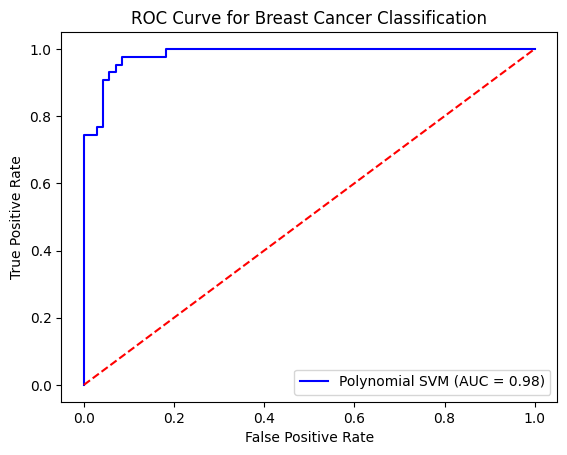

In [30]:
# 21  Develop an SVM classifier from scratch using a Polynomial Kernel on the Breast Cancer Wisconsin to 
# distinguish between  benign and malignant tumors. 
# Evaluate the classifier using a confusion matrix and ROC curve to analyze diagnostic accuracy.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

# --- Step 1: Load Dataset ---
df = pd.read_csv(r"C:\Users\sanap\Downloads\Breast Cancer Wisconsin (Diagnostic)_21.csv")
print("Dataset Loaded Successfully ✅")
print(df.head())

# --- Step 2: Preprocess Data ---
# Assuming columns: ['id','diagnosis','feature1','feature2',...]
df = df.drop(columns=['id'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': -1})  # M=Malignant, B=Benign

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# --- Normalize Features ---
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Define Polynomial Kernel ---
def polynomial_kernel(x1, x2, degree=3, c=1):
    return (np.dot(x1, x2.T) + c) ** degree

# --- Step 4: SVM from Scratch ---
class SimpleSVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000, degree=3):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.degree = degree

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.b = 0
        self.X = X
        self.y = y
        self.K = polynomial_kernel(X, X, self.degree)

        # Gradient descent training
        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = y[i] * (np.sum(self.alpha * y * self.K[:, i]) + self.b) < 1
                if condition:
                    self.alpha[i] += self.lr
                    self.b += self.lr * y[i]
        print(" SVM Training Completed")

    def predict(self, X):
        K_test = polynomial_kernel(X, self.X, self.degree)
        y_pred = np.sign(np.dot(K_test, self.alpha * self.y) + self.b)
        return y_pred

# --- Step 5: Train Model ---
svm = SimpleSVM(lr=0.0005, n_iters=500, degree=3)
svm.fit(X_train, y_train)

# --- Step 6: Predictions ---
y_pred = svm.predict(X_test)

# --- Step 7: Evaluation Metrics ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# --- Accuracy ---
acc = np.mean(y_pred == y_test)
print(f"\nModel Accuracy: {acc*100:.2f}%")

# --- Step 8: ROC Curve ---
y_scores = np.dot(polynomial_kernel(X_test, X_train, degree=3), svm.alpha * svm.y) + svm.b
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Polynomial SVM (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Breast Cancer Classification")
plt.legend()
plt.show()
